## dependencies

In [75]:
import random
import math
import json
from training_data import generate_train_data

## trainingsdaten generieren und extern abspeichern

In [76]:
training_data = generate_train_data(10, 3) # 10 pixelbilder generieren welche 3X3 pixel gross sind

training_data_sample = training_data[0]
training_data_sample_target = [1, 0] if training_data[0][1] == 1 else [0, 1]
training_data_sample_image = training_data[0][0]

print(training_data_sample) # beispiel einer horizontale

([0, 0, 0, 0, 0, 0, 1, 1, 1], 1)


In [77]:
# trainingsdaten in externem file sichern
file_path_dt = "../data/data_train.json"

with open(file_path_dt, "w") as file:
    json.dump(training_data, file, indent=4)

## Netzwerk initialisieren und extern ablegen und schön formatiert herausprinten
- funktionen definieren
- funktionen aufrufen

In [78]:
# funktion für fake weights und fake biases eines neurons
def init_bias():
    bias = random.uniform(-0.5, 0.5)
    return bias
#print(init_bias())

def init_weights(anz_weights):
    weights = [random.uniform(-0.5, 0.5) for _ in range(anz_weights)]
    return weights
#print(init_weights(4))


def init_network(dimension):

    network = [] # eine liste von listen von dictionaries (jedes neuron wird von einem dicrionary repräsentiert)
    
    # ----- Input layer ----- (hat keine biases oder weights!)
    # für jedes layer eine liste machen und diese mit den dictionaries füllen
    for layer in dimension[:1]: # nur für die input layers
        network.append([
            {
                "weights":None, 
                "bias":None, 
                "activation":None, 
                "error": None
            } for _ in range(layer)
        ]) # liste mit leeren dictionaries hinzufügen für jedes neuron des inputlayers

    # ----- Hidden layers -----
    # Für jedes Hidden-Layer eine Liste mit Dictionaries hinzufügen, diese haben weights und biases
    for index, layer in enumerate(dimension[1:-1], start=1):  # i startet bei 1, weil wir ab der 2. Schicht zählen
        network.append([
        {
            "weights": init_weights(dimension[index - 1]),  # Anzahl Gewichte = Anz. Neuronen im vorherigen Layer
            "bias": init_bias(),
            "activation": None, 
            "error": None
        } for _ in range(layer)  # Anzahl Neuronen in der aktuellen Schicht
    ])
        
    # ----- Output layer -----
    # Für das otput Layer eine Liste mit Dictionaries hinzufügen, diese haben weights und biases
    for index, layer in enumerate(dimension[-1:], start=-1):  # i startet bei 1, weil wir ab der 2. Schicht zählen
        network.append([
        {
            "weights": init_weights(dimension[index - 1]),  # Anzahl Gewichte = Anz. Neuronen im vorherigen Layer
            "bias": init_bias(),
            "activation": None, 
            "error": None
        } for _ in range(layer)  # Anzahl Neuronen in der aktuellen Schicht
    ])
    return network
#print(init_network([9, 5, 5, 2]))

In [79]:
network_dimension = [9, 5, 5, 2]

network_i = init_network(network_dimension) # netzerkt nach dem n-1 ten durchlauf

# funktion um das netzwerk schöner darzustellen
def print_array_structure(array):
    for i, layer in enumerate(array):
        print(f"🔹 Ebene {i}:")
        for j, element in enumerate(layer):
            print(f"  ▪ Element {j}: {{'weights': {element["weights"]}, 'bias': {element['bias']}, 'activation': {element['activation']}, 'target_activation': {element['activation']}, 'error': {element['error']}}}")
        print("\n")

print(f"\n------------------- Netzwerk (v.1) vor der Forward-Propagation mit initialisierten b, w -------------------\n")
print_array_structure(network_i)


------------------- Netzwerk (v.1) vor der Forward-Propagation mit initialisierten b, w -------------------

🔹 Ebene 0:
  ▪ Element 0: {'weights': None, 'bias': None, 'activation': None, 'target_activation': None, 'error': None}
  ▪ Element 1: {'weights': None, 'bias': None, 'activation': None, 'target_activation': None, 'error': None}
  ▪ Element 2: {'weights': None, 'bias': None, 'activation': None, 'target_activation': None, 'error': None}
  ▪ Element 3: {'weights': None, 'bias': None, 'activation': None, 'target_activation': None, 'error': None}
  ▪ Element 4: {'weights': None, 'bias': None, 'activation': None, 'target_activation': None, 'error': None}
  ▪ Element 5: {'weights': None, 'bias': None, 'activation': None, 'target_activation': None, 'error': None}
  ▪ Element 6: {'weights': None, 'bias': None, 'activation': None, 'target_activation': None, 'error': None}
  ▪ Element 7: {'weights': None, 'bias': None, 'activation': None, 'target_activation': None, 'error': None}
  ▪ Ele

In [80]:
# initialisiertes model "network_i" in das file "netzwerk_initialized" speichern
file_path_ni = "../model/netzwerk_initialized.json"

with open(file_path_ni, "w") as file:
    json.dump(network_i, file, indent=4)

## forward propagation
- aktivierungsfunktionen
- forward-propagation

In [81]:
# aktivierungsfunktionen

def activation_relu(x): # hidden layers (werden hier die resultate nicht immer mit jedem layer höher?)
    return max(0, x)

def softmax(x, x_list): # output layer
    x_list = [math.exp(i) for i in x_list]
    return math.exp(x) / sum(x_list)

print(softmax(2.0, [2.0, 1.0, 0.1]))

0.6590011388859679


In [82]:
# forwardpropagation

def forward_propagation(pixel_bild, netzwerk): # im pronzip füllt diese fuktion das feld "activation" des dictinaries!

    new_network = netzwerk

    # INPUT-LAYER: den inputwert des inputlayers als activation setzen
    for neuron in range(network_dimension[0]):
        new_network[0][neuron]["activation"] = pixel_bild[neuron] 

    # HIDDEN-LAYERS und OUTPUT-LAYER: die informationen n-ten layers werden ans n+1-ten layer weitergegeben (für das letzte layer muss eine sigmoid-funktin verwendet werden damit man die klassifiezierung so durchführen kann dass  näher bei 1 oder näher bei 0 aufteilen kann)
    for n in range(1, len(new_network)):
        outputs = []

        # folgendes wird für jedes neuron eines layers gemacht
        for neuron in range(network_dimension[n]):
            prev_activations = [new_network[n-1][i]["activation"] for i in range(network_dimension[n-1])] # liste mit activations des vorherigen layers
            akt_weights = new_network[n][neuron]["weights"] # liste mit den weights eines neurons des 2ten layers
            akt_bias = new_network[n][neuron]["bias"]
            
            # output-layer
            if n == len(new_network)-1:
                outputs.append(sum([prev_activations[x] * akt_weights[x] for x in range(len(prev_activations))]) + akt_bias)
                if neuron == network_dimension[n]-1:
                    pixel_updated_output = [softmax(outputs[output], outputs) for output in range((network_dimension[n]))]
                    for sm in range(len(pixel_updated_output)):
                        new_network[n][sm]["activation"] = pixel_updated_output[sm] # summe aller activations aus dem letzen layer  
            
            # alle anderen hidden layers
            else:
                pixel_updated = activation_relu(sum([prev_activations[x] * akt_weights[x] for x in range(len(prev_activations))]) + akt_bias)
                new_network[n][neuron]["activation"] = pixel_updated # summe aller activations aus dem letzen layer  

    return new_network, [node["activation"] for node in new_network[-1]] # mit pixelbild ist hier der semantsche vektor des letzen layers gemeint, also der activations des letzen layers

network_f = forward_propagation(training_data_sample[0], network_i)[0]
outputs_f = forward_propagation(training_data_sample[0], network_i)[1]

print(f"\n------------------- Netzwerk (v.2) nach der Forward-Propagation mit initialisierten a -------------------\n")
print_array_structure(network_f)
print(f"Outputs des letzten Layers: {outputs_f}")


------------------- Netzwerk (v.2) nach der Forward-Propagation mit initialisierten a -------------------

🔹 Ebene 0:
  ▪ Element 0: {'weights': None, 'bias': None, 'activation': 0, 'target_activation': 0, 'error': None}
  ▪ Element 1: {'weights': None, 'bias': None, 'activation': 0, 'target_activation': 0, 'error': None}
  ▪ Element 2: {'weights': None, 'bias': None, 'activation': 0, 'target_activation': 0, 'error': None}
  ▪ Element 3: {'weights': None, 'bias': None, 'activation': 0, 'target_activation': 0, 'error': None}
  ▪ Element 4: {'weights': None, 'bias': None, 'activation': 0, 'target_activation': 0, 'error': None}
  ▪ Element 5: {'weights': None, 'bias': None, 'activation': 0, 'target_activation': 0, 'error': None}
  ▪ Element 6: {'weights': None, 'bias': None, 'activation': 1, 'target_activation': 1, 'error': None}
  ▪ Element 7: {'weights': None, 'bias': None, 'activation': 1, 'target_activation': 1, 'error': None}
  ▪ Element 8: {'weights': None, 'bias': None, 'activatio

## prediction machen
prediction:
um eine prediction zu machen muss man einfach den output des letzen layers analysiern!
cross-entropy funktion:
um eine prediction zu machen beweten einen input mit der forwardprop durch das netz laufen lassen und die abweichung zu mtarget wert berechnen. bei einer prdiction muss nicht heissen dass das model auch automatisch triniert wird. aber ich mache es so dass jedes mal wo das model trainiert wird auch noch eine prediction berechnet wird um zu sehen wie sich das model verbessert hat! die prediction berechnet man mit der loss funktion.

In [83]:
# diese fuktion fässt das resultat des letzen layers in worte
# der netzwerk_output ist immer eine liste von wahrscheinlichkeiten die zusammen 1 ergeben (softmax), die erste wk steht für horizontal und die zweite steht für vertikal. die die höher ist ist das resuotat!
def predict(network_output):
    if network_output[0]+network_output[1] != 1:
        return "Die Prediction hat eine komische Form und ergibt nicht 1 in der Summe!"
    if network_output[0] == network_output[1]:
        return "Die prediction ist bei beide gleich gross!"

    max_pred = max(network_output)
    for index, pred in enumerate(network_output):
        if pred == max_pred:
            prediction = "horizontal" if index == 0 else "vertikal"
    return prediction

print(predict([0.2, 0.8]))

vertikal


## Backpropagation

**loss funktion:** 
warum ein log? für kleine werte (tiefe wks) gibt es grosse outputs! das heisst dass für eine kleine WK wie 0.1 ein grosser fehler berechnet wird! (das sorgt dafür dasss die back-prop nicht nur für die momentanen resultate optimiet sondern such für vergangene)

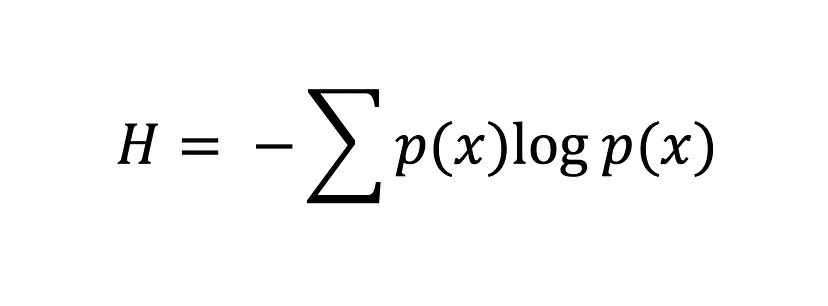 ![loss-funktion](../loss_funktion_ableitung.jpg)

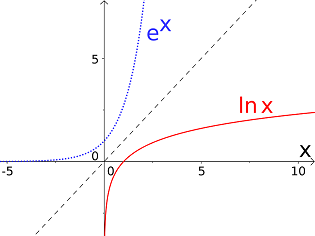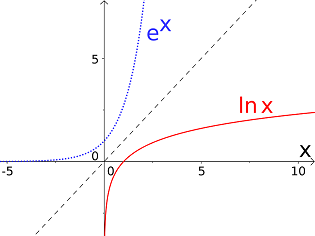

**gradient descent:**

was macht gradient descent = es berechnet für das aktuelle neuron das neu gewicht!

was ist ein gradient?
- ein gradients ist eine menge (liste) von partiellen ableitungen. wenn man eine funktion f(x, y, z) ableitet bekommt man 3 partielle abletungen, eine für x, y, z! hier kann man x, y, z als die verschiedenen weigts sehen oder vilmehr ihre faktoren !
- den partiellen gradient berechnet man für jedes gewicht eines neurons, dieser gradient sagt uns dann wie stark dieses gewicht zum loss beigetragen hat!

   - a = lernrate, so stark werden die gewichte verändert (werte zwischen 0.001 und 0.01)
   - gradient (ableitung) = aprev * error = bringt variatät hinein damit alle neuronen der selben schicht nicht gleich sind. da sie bei der berechnung der aktuellen activation mit den weights multipliziert wurden habe sie bestimmt wie stark das weigth einfluss auf den error hatte, es ist also ein einflussfaktor bei der berechnung des errors (ich verwende hier die vereinfachte variante!)
   - w = das letzte weight muss auch noch miteinfliessen damit das model nicht komplett neu überschrieben wird! wenn neue gewichte entstehen passiert das immer nter berücksichtigung der alten gewichte!

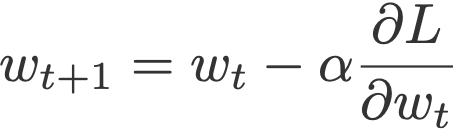

In [84]:
# funktionen

# der output ist eine zahl für ein layer: den error für das gesamte outputlayer berechnen (das braucht man nur um zu messen wie gut das modell!)
def cross_entropy_loss(predictions, targets):
    
    epsilon = 1e-15  # Kleiner Wert, um log(0) zu vermeiden
    predictions = [max(p, epsilon) for p in predictions]  # Verhindert log(0)
    
    return -sum(tar * math.log(pred) for pred, tar in zip(predictions, targets)) # mathematische formel für das loss

def calc_error(pred, target):
    return target - pred


print(cross_entropy_loss([1, 0], [1, 0])) # der loss ist nicht null wenn es dem target entspricht sondern wenn 100% zu 0% steht!
print(cross_entropy_loss([0.9, 0.1], [1, 0])) # ein sehr geringes loss für eine sehr gute prediction!

-0.0
0.10536051565782628


In [85]:
# funktionen für die backpropagation

# lossfunktion um das loss ienes einzelnen neurons zu berechnen mithilfe der weigths
def calc_gradients(a_func, a, prev_activations, p_target):

    new_weights = []
    if a_func == "relu":
        a_ableitung = 1 if a > 0 else 0
        
    else:
        a_ableitung = a * (1 - a)
    
    # für jedes weights die ableitung berechnen
    for activation in prev_activations:
        # new_weight = -1 * p_target * 1 / weight * activation # das ist die berechnung zur ableitung eines weights (weil die anderen weights als parameter betrachtet werden können die wie konstanten beim ableiten einfach weggestrichen werden! Achtung man muss die ableitung der aktivierungsfunktion auch berücksichtigen!)
        new_weight = p_target * a_ableitung * a # das ist die berechnung zur ableitung eines weights (weil die anderen weights als parameter betrachtet werden können die wie konstanten beim ableiten einfach weggestrichen werden! Achtung man muss die ableitung der aktivierungsfunktion auch berücksichtigen!)
        new_weights.append(new_weight)
    
    return new_weights


def calc_new_weight(old_weight, learning_rate, gradient):
    new_weight = old_weight - learning_rate * gradient
    return new_weight


def calc_target_a(next_errors, next_weights, a):
    error_sum = sum(next_errors[i]*next_weights[i] for i in range(len(next_errors)))
                    
    # ableitung der aktivierungsfunktion (relu) der hidden layers berechnen da diese funktion nur bei den hidden layers angewendet wird
    a_derivative = 1 if a > 0 else 0

    a_target = error_sum * a_derivative

    return a_target
    

In [86]:
# backpropagation
def backprop(netzwerk, target, lr):

    network_b = netzwerk

    # LOSS fürs gesamte layer. wie gut ist das modell? (LOSS für das letzte layer berechnen)
    predictions = [network_b[-1][pred]["activation"] for pred in range(len(network_b[-1]))]
    targets = [tar for tar in target]
    loss = cross_entropy_loss(predictions, targets)
    print(f"Cross Entropy Loss des Output layers: {loss}")

    for layer in reversed(range(len(network_b))): # man geht rckwärts durch die liste aber die layerindexe bleiben die gleichen

        print(f"\n ---------- Layer {layer} ---------- \n")
    
        # OUTPUT-LAYER und HIDDEN-LAYERS -----------------------
        for neuron in range(len(network_b[layer])): # folgendes für jedes neurpn des letzen layer machen
            
            if layer == len(network_b)-1: # das letzte layer
                a_target = target[neuron]
                a_func = "softmax"
                error = calc_error(network_b[-1][neuron]["activation"], a_target) # ERROR-BERECHNEN-FUNKTION
            elif layer == 0: # das erste layer
                a_func = "relu"
                error = None
                return network_b
            else:
                next_errors = [network_b[layer+1][err]["error"] for err in range(len(network_b[layer+1]))]
                #print(f"next_errors: {next_errors}")
                next_weights = [network_b[layer+1][w]["weights"][neuron] for w in range(len(network_b[layer+1]))]
                a = network_b[layer][neuron]["activation"]
                a_target = calc_target_a(next_errors, next_weights, a)
                error = calc_error(network_b[layer][neuron]["activation"], a_target) # ERROR-BERECHNEN-FUNKTION

            # den error ins dict hinzufügen
            network_b[layer][neuron]["error"] = error
            print(f"Error: {error}")

            # gradienten berechnen
            weights = network_b[layer][neuron]["weights"]
            prev_activations = [network_b[layer-1][n]["activation"] for n in range(len(network_b[layer-1]))]
            bias = network_b[layer][neuron]["bias"]
            a = network_b[layer][neuron]["activation"]
        
            gradients = calc_gradients(a_func, a, prev_activations, a_target) # GRADIENT-BERECHNEN-FUNKTION für die weigths
            print(f"Gradients of neuron Nr.{neuron}: {gradients}")

            # mithilfe der gradienten die neuen weights berechnen und mit den alten ersetzen
            new_weights = [calc_new_weight(old_weight, lr, gradient) for old_weight, gradient in zip(weights, gradients)] # WEIGHT-UPDATE-FUNKTION
            network_b[layer][neuron]["weights"] = new_weights
            print(f"Die weights: {weights} werden mit den weights {new_weights} ersetzt!")

            # die neuen biases berechnen und mit den alten ersetzen
            new_bias = network_b[layer][neuron]["bias"] - lr * error
            print(f"der Bias: {bias} wird mit {new_bias} ersetzt!")


network_b = backprop(network_f, [0, 1], 0.01)

print(f"\n------------------- Netzwerk (v.3) nach der Backward-Propagation mit veränderten w, b -------------------\n")
print_array_structure(network_b)

Cross Entropy Loss des Output layers: 0.7804435219559693

 ---------- Layer 3 ---------- 

Error: -0.541797256745285
Gradients of neuron Nr.0: [0.0, 0.0, 0.0, 0.0, 0.0]
Die weights: [0.3040350051877949, 0.362933057353379, 0.17230101454862534, -0.4152678717476682, -0.4217020525645335] werden mit den weights [0.3040350051877949, 0.362933057353379, 0.17230101454862534, -0.4152678717476682, -0.4217020525645335] ersetzt!
der Bias: -0.15625408839192734 wird mit -0.15083611582447448 ersetzt!
Error: 0.5417972567452849
Gradients of neuron Nr.1: [0.1137502007315337, 0.1137502007315337, 0.1137502007315337, 0.1137502007315337, 0.1137502007315337]
Die weights: [-0.4119681030297825, -0.05830109053717403, 0.36087237216399637, -0.2212145500596937, 0.21354452004835478] werden mit den weights [-0.4131056050370978, -0.05943859254448936, 0.35973487015668104, -0.22235205206700903, 0.21240701804103945] ersetzt!
der Bias: -0.29033269689943275 wird mit -0.2957506694668856 ersetzt!

 ---------- Layer 2 -------

## Das Model laufen lassen von A bis Z
training: es wird immer ein loss berechnet, wie viel weicht die prediction vom gewollte wert ab? -> output der lossfunktion der backprop
testing: was sagt die prediction? vertikal oder horizontal? -> output der softmax-funktion des outputlayers

folgendes muss nich erledigt werden:
- die weights irgendwo storen
- daten irgedwo extern storen
- frontend
- abbildungen für das netz und die pixelbilder
- statt von bild zu zahl (vertikal vs. horizontal) auch das umgekehert machen von zahl zu bild

In [91]:
# den gesamten ableuf um das model zu trainieren
'''
input:
- ein pixelbild (in doeser form mus es sein: ...)
- die prediction für dieses pixelbild (in dieser form muss das sein: ...)
'''

def target_converter(target):
    if target == 1:
        target = [1, 0]
    else:
        target = [0, 1]

    return target

# initialisiertes netzwerk
with open(file_path_ni, "r") as file:
    nn_i = json.load(file)

# trainingsdaten
with open(file_path_dt, "r") as file:
    data_train = json.load(file)

# alle benörigten daten werden aus den jsons geholt!
print("\n======== DATA ========") 
pixelbild = data_train[0][0] # ein beispiel der trainingsdaten
target = data_train[0][1]
print(f"Pixelbild: {pixelbild}, Target: {target}")
nn = nn_i # initialisiertes netzwerk vom json-file holen
print(f"Netzwerk1: {nn}")


def train(nn1, input, target):

    target = target_converter(target)

    print("\n========== FP ============")
    # forward-propagation:
    nn2, last_activations = forward_propagation(input, nn1)
    prediction = predict(last_activations)
    print(f"Prediction: {prediction}")
    print(f"Netzwerk2: {nn2}")

    # loss-funktion: wie gut ist die prediction? -> dise wird innerhalb der backprop gemacht

    print("\n========== BP ============")
    # backward-propagation:
    nn3 = backprop(nn2, target, 0.01)
    print(f"Netzwerk3: {nn3}")

    return nn3

#train(nn, pixelbild, target)

# mehrere iterationen von trainieren! (loop mit train machen)
def train_iterations(nn1, data_train):
    nn3_list = []
    for index in range(len(data_train)):
        print(f"**Iteration {index+1}**")
        nn3 = train(nn1, data_train[index][0], data_train[index][1])
        nn3_list.append(nn3)
        nn1 = nn3 # nach jeder iteration muss man als neues input-netzwerk das neu kreierte definieren

    return nn3_list

nn3_list = train_iterations(nn, data_train)
nn_pretrained = nn3_list[-1]


# hier wird die forward-prop gemacht und kein trainigng mit prediction und allem...
# diese funktion ruft man mit einem netzwerk auf welches beretis trainiert wurde! für den inut nutzt man trainingsdaten!
def test(nn1, input):
    nn2, last_activations = forward_propagation(input, nn1)
    print(f"Netzwerk2: {nn2}")
    prediction = predict(last_activations)
    print(f"Prediction: {prediction}")

test(nn_pretrained, pixelbild)


======== DATA ========
Pixelbild: [0, 0, 0, 0, 0, 0, 1, 1, 1], Target: 1
Netzwerk1: [[{'weights': None, 'bias': None, 'activation': None, 'error': None}, {'weights': None, 'bias': None, 'activation': None, 'error': None}, {'weights': None, 'bias': None, 'activation': None, 'error': None}, {'weights': None, 'bias': None, 'activation': None, 'error': None}, {'weights': None, 'bias': None, 'activation': None, 'error': None}, {'weights': None, 'bias': None, 'activation': None, 'error': None}, {'weights': None, 'bias': None, 'activation': None, 'error': None}, {'weights': None, 'bias': None, 'activation': None, 'error': None}, {'weights': None, 'bias': None, 'activation': None, 'error': None}], [{'weights': [-0.20575823848116392, 0.2201043214747186, -0.21695264882232124, 0.16565075557855768, 0.09788478079093976, -0.3936763251351326, -0.49508420608050885, -0.3665145696500822, 0.15000202079047686], 'bias': 0.35248515051710183, 'activation': None, 'error': None}, {'weights': [0.05524884492423

In [88]:
# am ende der trainingsrunde das neuste ud beste modell dem json hineintun und mit dem alten somit ersetzen
file_path_n = "../model/netzwerk.json"
with open(file_path_n, "w") as file:
    json.dump(nn_pretrained, file, indent=4)

# die liste mit allen modellen aller trainingsrunden ins json laden
file_path_nh = "../model/netzwerk_history.json"
with open(file_path_nh, "w") as file:
    json.dump(nn3_list, file, indent=4)